In [195]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [196]:
import matplotlib.font_manager as fm

# 디렉토리 및 파일 이름에 맞추어 변경
path='/home/centos/suhyeok/parkinglot/'
font_location = path+'NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [197]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
age_gender_info = pd.read_csv('./age_gender_info.csv')
#공가 = 아무도 살지 않는 빈 집 1호의 가옥
#공가수 = 아무도 살지 않는 집의 수

In [198]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [199]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [200]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [202]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,2952.0,886.661247,513.540168,26.00,513.50,779.00,1106.0000,2568.0
전용면적,2952.0,44.757215,31.874280,12.62,32.10,39.93,51.5625,583.4
전용면적별세대수,2952.0,102.747967,132.640159,1.00,14.00,60.00,144.0000,1865.0
공가수,2952.0,12.921070,10.778831,0.00,4.00,11.00,20.0000,55.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),2741.0,0.176578,0.427408,0.00,0.00,0.00,0.0000,3.0
도보 10분거리 내 버스정류장 수,2948.0,3.695726,2.644665,0.00,2.00,3.00,4.0000,20.0
단지내주차면수,2952.0,601.668360,396.407072,13.00,279.25,517.00,823.0000,1798.0
등록차량수,2952.0,559.768293,433.375027,13.00,220.00,487.00,770.0000,2550.0


In [203]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,1022.0,862.080235,536.340894,75.00,488.000,745.00,1161.0,2572.0
전용면적,1022.0,43.706311,35.890759,9.96,33.135,39.72,47.4,583.4
전용면적별세대수,1022.0,100.414873,125.997855,1.00,14.000,60.00,140.0,1341.0
공가수,1022.0,15.544031,11.070140,0.00,6.000,15.00,23.0,45.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),980.0,0.136735,0.435500,0.00,0.000,0.00,0.0,2.0
도보 10분거리 내 버스정류장 수,1022.0,4.626223,5.414568,1.00,2.000,3.00,5.0,50.0
단지내주차면수,1022.0,548.771037,342.636703,29.00,286.000,458.00,711.0,1696.0


/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.draw()
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.draw()
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.draw()
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.draw()
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/utils.py

/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL S

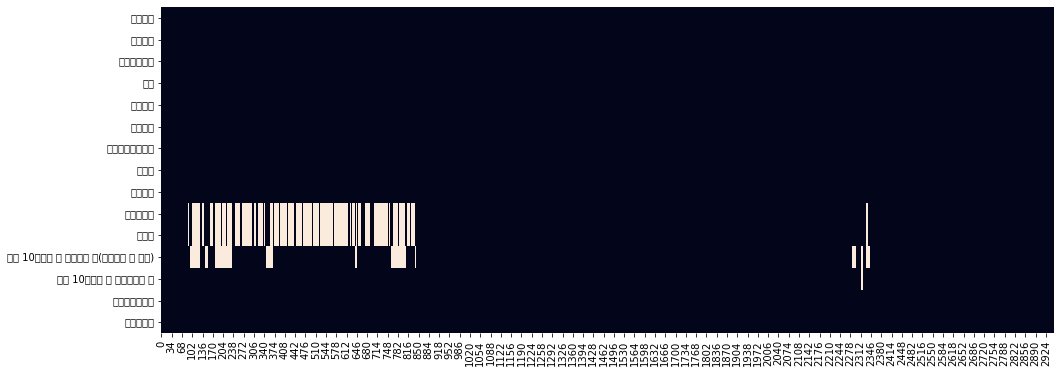

In [204]:
plt.figure(figsize=(16, 6))
sns.heatmap(train.isnull().T, cbar=False)
plt.show()

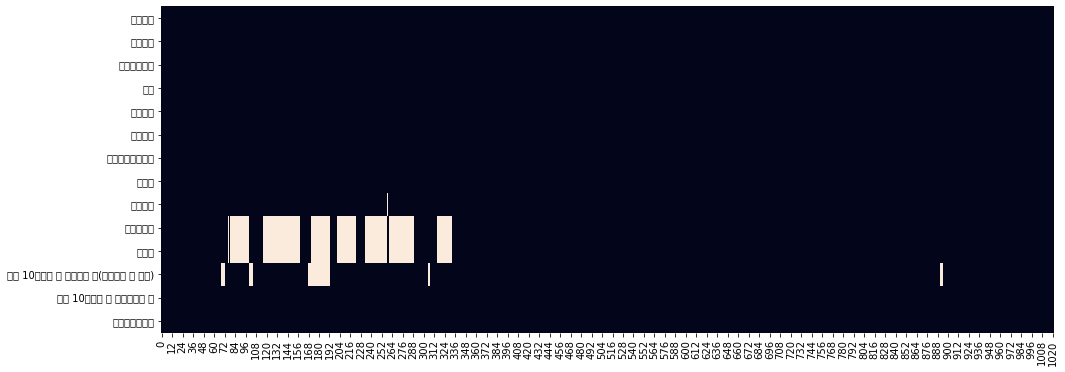

In [205]:
plt.figure(figsize=(16, 6))
sns.heatmap(test.isnull().T, cbar=False)
plt.show()

In [206]:
numeric_cols = []
for col in train.columns:
    if train[col].dtypes != 'object':
        numeric_cols.append(col)

In [207]:
numeric_cols

['총세대수',
 '전용면적',
 '전용면적별세대수',
 '공가수',
 '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
 '도보 10분거리 내 버스정류장 수',
 '단지내주차면수',
 '등록차량수']

i값: 0
i값: 1
i값: 2
i값: 3
i값: 4
i값: 5
i값: 6
i값: 7


/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL 

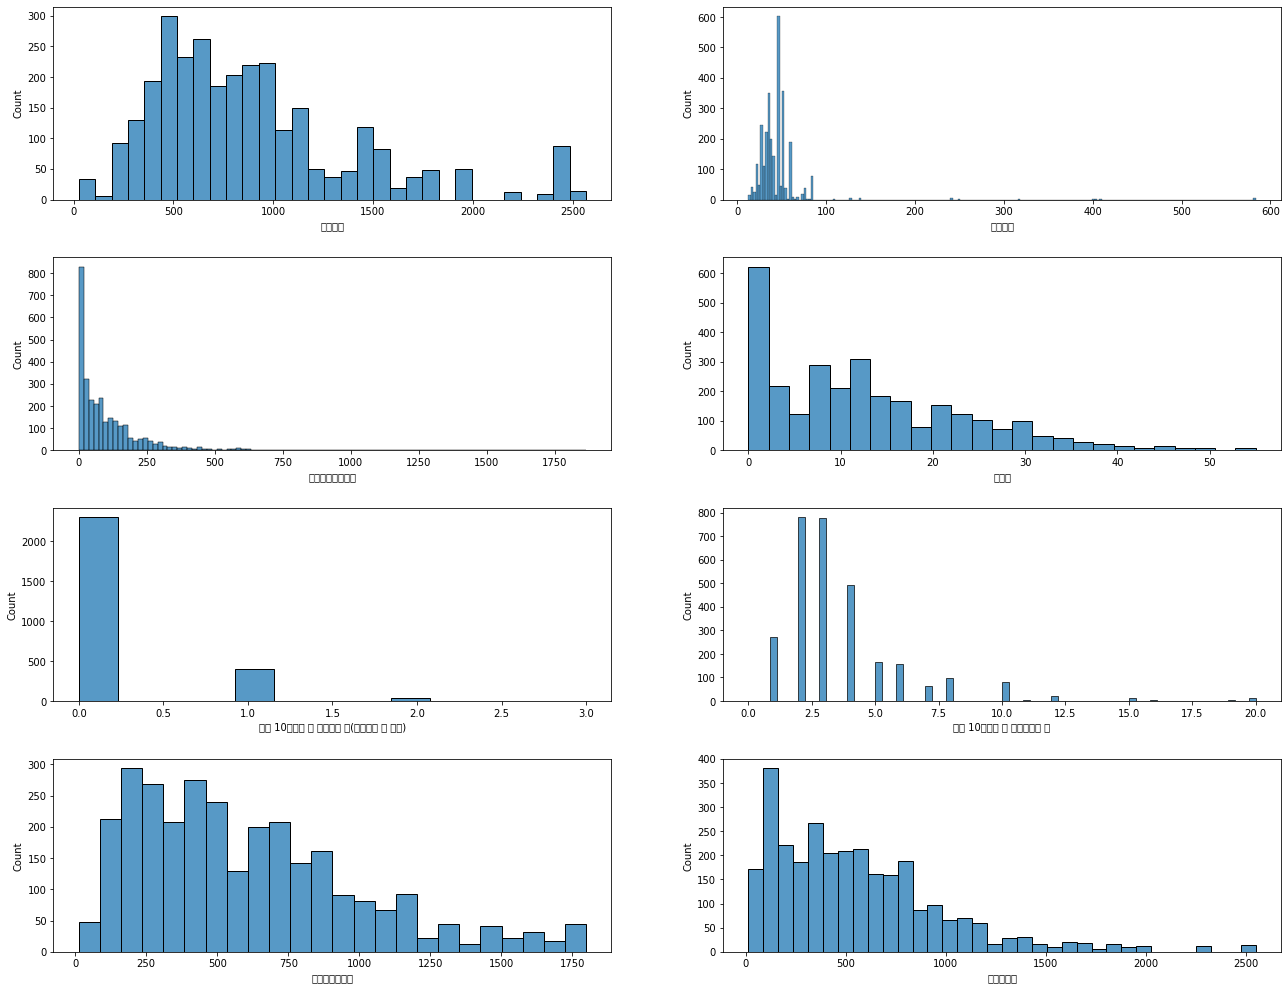

In [208]:
fig = plt.figure(figsize=(22, 22))
for i, n in enumerate(numeric_cols):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.histplot(train[n])
    print("i값:",i)

In [209]:
train.지역.unique()

array(['경상북도', '경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도',
       '부산광역시', '제주특별자치도', '울산광역시', '충청북도', '전라남도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

In [210]:
test.지역.unique()

array(['경기도', '부산광역시', '전라북도', '경상남도', '충청남도', '대전광역시', '제주특별자치도', '강원도',
       '울산광역시', '경상북도', '충청북도', '광주광역시', '전라남도', '대구광역시', '세종특별자치시'],
      dtype=object)

In [211]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [212]:
test.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [213]:
train[train.임대료.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0


In [214]:
train[train.임대료=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2043,C1397,370,아파트,서울특별시,장기전세,23.32,51,9.0,A,87444000,-,0.0,3.0,1590.0,1595.0
2044,C1397,370,아파트,서울특별시,장기전세,46.79,4,9.0,A,174888000,-,0.0,3.0,1590.0,1595.0
2045,C1397,370,아파트,서울특별시,장기전세,46.91,69,9.0,A,174888000,-,0.0,3.0,1590.0,1595.0
2046,C1397,370,아파트,서울특별시,장기전세,51.96,24,9.0,A,194562000,-,0.0,3.0,1590.0,1595.0
2047,C1397,370,아파트,서울특별시,장기전세,51.99,80,9.0,A,194562000,-,0.0,3.0,1590.0,1595.0
2048,C1397,370,아파트,서울특별시,장기전세,59.93,142,9.0,A,216423000,-,0.0,3.0,1590.0,1595.0
2100,C1039,790,아파트,서울특별시,장기전세,51.32,126,13.0,A,187694000,-,0.0,3.0,673.0,645.0
2101,C1039,790,아파트,서울특별시,장기전세,59.88,49,13.0,A,213863000,-,0.0,3.0,673.0,645.0
2102,C1039,790,아파트,서울특별시,장기전세,59.94,75,13.0,A,213863000,-,0.0,3.0,673.0,645.0
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0


In [215]:
train[train.임대보증금.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0


In [216]:
train[train.임대보증금=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,-,-,0.0,3.0,338.0,345.0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,-,-,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,-,-,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,-,-,0.0,8.0,664.0,744.0


In [217]:
train.loc[train.임대보증금=='-','임대보증금']

2547    -
2548    -
2549    -
2550    -
2551    -
2680    -
2681    -
2682    -
2683    -
2906    -
2907    -
2908    -
Name: 임대보증금, dtype: object

In [218]:
train[train.단지코드=='C2547']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [219]:
train.loc[[2547,2548,2549]]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0


In [220]:
test[test['임대보증금'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,NaN,0.0,5.0,131.0
329,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,NaN,0.0,5.0,131.0
330,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,NaN,0.0,5.0,131.0
331,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,NaN,0.0,5.0,131.0


In [221]:
test.loc[test.임대보증금=='-','임대보증금']

1005    -
1006    -
1014    -
1015    -
1016    -
1017    -
Name: 임대보증금, dtype: object

In [222]:
test.loc[[1005,1006,1014,1015,1016,1017]]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
1005,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,C,-,-,0.0,1.0,40.0
1006,C2152,120,아파트,강원도,영구임대,33.84,54,9.0,C,-,-,0.0,1.0,40.0
1014,C1267,675,아파트,경상남도,행복주택,16.94,50,38.0,L,-,-,0.0,1.0,467.0
1015,C1267,675,아파트,경상남도,행복주택,26.85,66,38.0,L,-,-,0.0,1.0,467.0
1016,C1267,675,아파트,경상남도,행복주택,26.85,8,38.0,L,-,-,0.0,1.0,467.0
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0


In [223]:
#일단 column 이름 좀 바꿔줘서 이름 좀 짧게 만들기
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수']

In [224]:
#이름 바뀐거 확인
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [225]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [226]:
# Nan값만 있는줄 알았는데 -값도 있어서 우선 -로 처리되어 있는 행들을 NaN으로 바꿔주기
# 후에 Nan값에 실값을 줄것인지 아니면 지역에 따라 평균내서 넣을것인지 정하기
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료']=np.nan
test.loc[test.임대료=='-', '임대료']=np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

In [227]:
train[train.지하철.isnull()].지역.value_counts()

충청남도     114
대전광역시     93
경상남도       4
Name: 지역, dtype: int64

In [228]:
train[train.버스.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000.0,456000.0,NaN,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000.0,462000.0,NaN,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000.0,462000.0,NaN,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000.0,462000.0,NaN,NaN,1066.0,855.0


In [229]:
# 동일한 단지에 코드가 2개로 부여된 단지 코드 행 삭제
# 'C2675'의 경우 test set에 있으므로 후에 test set에서 삭제
second_error_data = ['C2085','C1397','C2431','C1649','C1036','C1095','C2051','C1218','C1894','C2483','C1502','C1988']

for error in second_error_data:
    error_index = train[train['단지코드'] == error].index
    train.drop(error_index, inplace=True)

In [230]:
train.shape

(2869, 15)

In [231]:
#train과 test에서 임대보증금이 null값인 애들 찾기
train[train.임대보증금.isnull()].공급유형.value_counts()

임대상가    562
국민임대      8
공공분양      7
행복주택      4
Name: 공급유형, dtype: int64

In [232]:
test[test.임대보증금.isnull()].공급유형.value_counts()

임대상가    177
영구임대      5
행복주택      4
Name: 공급유형, dtype: int64

In [233]:
train[train.임대보증금.isnull()].자격유형.value_counts()

D    569
H      8
K      4
Name: 자격유형, dtype: int64

In [234]:
test[test.임대보증금.isnull()].자격유형.value_counts()

D    180
L      4
C      2
Name: 자격유형, dtype: int64

In [235]:
train[train.자격유형.isin(['D', 'H', 'K'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 88 to 2919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      757 non-null    object 
 1   총세대수      757 non-null    int64  
 2   임대건물구분    757 non-null    object 
 3   지역        757 non-null    object 
 4   공급유형      757 non-null    object 
 5   전용면적      757 non-null    float64
 6   전용면적별세대수  757 non-null    int64  
 7   공가수       757 non-null    float64
 8   자격유형      757 non-null    object 
 9   임대보증금     176 non-null    float64
 10  임대료       176 non-null    float64
 11  지하철       623 non-null    float64
 12  버스        757 non-null    float64
 13  단지내주차면수   757 non-null    float64
 14  등록차량수     757 non-null    float64
dtypes: float64(8), int64(2), object(5)
memory usage: 94.6+ KB


In [236]:
test[test.자격유형.isin(['D', 'L', 'C'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 73 to 1017
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      226 non-null    object 
 1   총세대수      226 non-null    int64  
 2   임대건물구분    226 non-null    object 
 3   지역        226 non-null    object 
 4   공급유형      226 non-null    object 
 5   전용면적      226 non-null    float64
 6   전용면적별세대수  226 non-null    int64  
 7   공가수       226 non-null    float64
 8   자격유형      226 non-null    object 
 9   임대보증금     40 non-null     float64
 10  임대료       40 non-null     float64
 11  지하철       201 non-null    float64
 12  버스        226 non-null    float64
 13  단지내주차면수   226 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 26.5+ KB


In [237]:
#버스랑 지하철 확인
train['버스'].unique()

array([ 3.,  1.,  2.,  6., 10.,  5.,  4.,  7., 12., 14.,  8.,  0., 20.,
       11., 16., 15., 19.])

In [238]:
test['버스'].unique()

array([ 2.,  3., 16.,  6.,  1.,  4.,  5.,  8., 10., 13.,  7., 11., 50.,
       12., 14., 18., 15., 19., 17.])

In [239]:
train['지하철'].unique()

array([ 0.,  1., nan,  2.,  3.])

In [240]:
test['지하철'].unique()

array([ 0., nan,  2.,  1.])

In [241]:
# test와 train에서 지하철이 null값인 애들 발견 얘네 지역 찍어보자
# 충청남도와 대전광역시인데 대전은 충남은 지하철이 없다쳐도 대전은 있는데?
# 충남은 지하철 0으로 대체하고 대전은 지하철 찍어봐야할듯하다
train[train['지하철'].isnull()].지역.value_counts()

충청남도     114
대전광역시     93
Name: 지역, dtype: int64

In [242]:
train[train.지역=="대전광역시"]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
15,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000.0,127350.0,1.0,1.0,1285.0,1064.0
16,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000.0,127350.0,1.0,1.0,1285.0,1064.0
17,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000.0,127350.0,1.0,1.0,1285.0,1064.0
18,C1407,1216,아파트,대전광역시,국민임대,41.11,148,13.0,A,27637000.0,164610.0,1.0,1.0,1285.0,1064.0
19,C1407,1216,아파트,대전광역시,국민임대,41.39,74,13.0,A,27637000.0,164610.0,1.0,1.0,1285.0,1064.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,C2298,581,아파트,대전광역시,행복주택,16.85,96,21.0,J,16400000.0,79000.0,0.0,3.0,408.0,444.0
2836,C2298,581,아파트,대전광역시,행복주택,26.64,204,21.0,J,24520000.0,118000.0,0.0,3.0,408.0,444.0
2837,C2298,581,아파트,대전광역시,행복주택,26.64,30,21.0,J,24520000.0,118000.0,0.0,3.0,408.0,444.0
2838,C2298,581,아파트,대전광역시,행복주택,36.86,148,21.0,J,33640000.0,162000.0,0.0,3.0,408.0,444.0


In [243]:
# 충청남도는 지하철이 없으므로 지하철에 0값 대입
train.loc[train.지역.isin(['충청남도'])&train.지하철.isnull(),'지하철']=train['지하철'].fillna(0)

In [244]:
train[train['지하철'].isnull()].지역.value_counts()

대전광역시    93
Name: 지역, dtype: int64

In [245]:
# 대전광역시는 지하철이 있으므로 평균값을 넣을까했는데 고민이네
train.loc[train.지역.isin(['대전광역시'])&train.지하철.isnull(),'지하철']=train.loc[train.지역=='대전광역시','지하철'].mean()
#train.loc[train.지역.isin(['대전광역시'])&train.지하철.isnull(),'지하철']=train['지하철'].fillna(0)
#train.loc[train.지역=='대전광역시','지하철'].mean()의 값은 0.722543352601156

In [246]:
# train 지하철 null값 처리 완료
train[train['지하철'].isnull()].지역.value_counts()

Series([], Name: 지역, dtype: int64)

In [247]:
test[test['지하철'].isnull()].지역.value_counts()

충청남도     33
대전광역시     9
Name: 지역, dtype: int64

In [248]:
test.loc[test.지역.isin(['충청남도'])&test.지하철.isnull(),'지하철']=test['지하철'].fillna(0)
test.loc[test.지역.isin(['대전광역시'])&test.지하철.isnull(),'지하철']=test.loc[test.지역=='대전광역시','지하철'].mean()
#train.loc[train.지역.isin(['대전광역시'])&train.지하철.isnull(),'지하철']=train['지하철'].fillna(0)
#test.loc[test.지역=='대전광역시','지하철'].mean() 값은 1.2765957446808511

In [249]:
# test 지하철 null 값 처리 완료
test[test['지하철'].isnull()].지역.value_counts()

Series([], Name: 지역, dtype: int64)

In [250]:
train.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       581
임대료         584
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [251]:
test.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          2
임대보증금       186
임대료         186
지하철           0
버스            0
단지내주차면수       0
dtype: int64

In [252]:
test['버스'].value_counts()

2.0     252
3.0     166
4.0     134
1.0     117
5.0     112
6.0      85
7.0      48
8.0      33
16.0     13
11.0     11
15.0     10
50.0      9
18.0      7
14.0      6
12.0      5
17.0      4
10.0      4
19.0      3
13.0      3
Name: 버스, dtype: int64

In [253]:
# 이 시키는 왜 10분내 버스 정류장 갯수가 50갠데
test[test.버스 == 50]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
383,C1852,898,아파트,경기도,국민임대,39.59,219,6.0,H,23720000.0,197230.0,0.0,50.0,785.0
384,C1852,898,아파트,경기도,국민임대,39.72,56,6.0,A,23720000.0,197230.0,0.0,50.0,785.0
385,C1852,898,아파트,경기도,국민임대,39.72,44,6.0,A,23720000.0,197230.0,0.0,50.0,785.0
386,C1852,898,아파트,경기도,국민임대,46.90,46,6.0,A,37454000.0,259660.0,0.0,50.0,785.0
387,C1852,898,아파트,경기도,국민임대,46.90,22,6.0,A,37454000.0,259660.0,0.0,50.0,785.0
388,C1852,898,아파트,경기도,국민임대,46.90,225,6.0,H,37454000.0,259660.0,0.0,50.0,785.0
389,C1852,898,아파트,경기도,국민임대,51.93,136,6.0,H,45193000.0,308350.0,0.0,50.0,785.0
390,C1852,898,아파트,경기도,국민임대,51.93,44,6.0,H,45193000.0,308350.0,0.0,50.0,785.0
391,C1852,898,아파트,경기도,국민임대,59.61,106,6.0,H,61674000.0,370790.0,0.0,50.0,785.0


In [254]:
# 50개를 평균으로 넣어주기
test.loc[test['버스'] == 50, '버스'] = train['버스'].mean()

In [255]:
# test에 있는 자격유형 Null값 확인 및 바꿔주기
test[test["자격유형"].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [256]:
test[test.단지코드=='C2411']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0


In [257]:
#C2411은 A로 바꿔주기
test.loc[test.단지코드.isin(['C2411'])&test.자격유형.isnull(),'자격유형']='A'

In [258]:
test[test.단지코드=='C2253']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,NaN,NaN,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,NaN,NaN,0.0,2.0,173.0
263,C2253,1161,상가,강원도,임대상가,22.91,1,0.0,D,NaN,NaN,0.0,2.0,173.0
264,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,NaN,NaN,0.0,2.0,173.0
265,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,NaN,NaN,0.0,2.0,173.0
266,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,NaN,NaN,0.0,2.0,173.0
267,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,NaN,NaN,0.0,2.0,173.0


In [259]:
#C2253은 C로 바꿔주기
test.loc[test.단지코드.isin(['C2253'])&test.자격유형.isnull(),'자격유형']='C'

In [260]:
#임대보증금 및 임대료 Null값 처리하기

/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HA

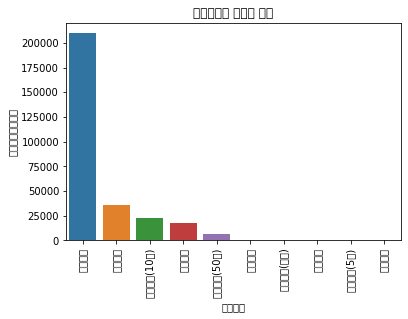

In [261]:
sns.barplot(data=train.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False),
            x=train.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False).index, y='전용면적별세대수')
plt.xticks(rotation=90)
plt.title('공급유형별 세대수 합계')
plt.show()

In [262]:
train.groupby(['공급유형']).sum().sort_values(['전용면적별세대수'])

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
공급유형,,,,,,,,,,
장기전세,2370,171.14,250,39.0,6.154200e+08,0.0,0.000000,9.0,2019.0,1935.0
공공임대(5년),1908,146.66,406,3.0,8.100000e+07,1200000.0,3.000000,6.0,2316.0,2661.0
임대상가,701025,25498.79,562,4231.0,0.000000e+00,0.0,206.849711,2046.0,150502.0,89017.0
공공임대(분납),5899,501.70,570,6.0,7.385770e+08,1847780.0,2.167630,30.0,6776.0,8981.0
공공분양,9807,564.63,711,14.0,0.000000e+00,0.0,5.057803,42.0,11452.0,16205.0
공공임대(50년),20188,1360.85,6094,75.0,4.325920e+08,6248970.0,4.890173,152.0,9401.0,9739.0
행복주택,150256,5674.62,17297,5085.0,6.906768e+09,25127050.0,18.000000,661.0,101413.0,71460.0
공공임대(10년),149370,12298.80,22807,1795.0,8.815267e+09,90482080.0,17.167630,648.0,165655.0,211600.0
영구임대,167934,4395.13,36347,1315.0,1.302124e+09,14274890.0,52.393064,567.0,68357.0,57781.0


In [263]:
train[train['임대료'].isnull()].지역.value_counts()

부산광역시      225
대전광역시      120
경상남도        97
충청남도        76
강원도         35
제주특별자치도     25
서울특별시        3
대구광역시        3
Name: 지역, dtype: int64

In [264]:
train[train.임대료.isnull()].자격유형.value_counts()

D    569
H      8
K      4
A      3
Name: 자격유형, dtype: int64

In [265]:
train.loc[train.자격유형.isin(['A'])&train.임대료.isnull(),'자격유형']

2100    A
2101    A
2102    A
Name: 자격유형, dtype: object

In [266]:
# 서울특별시 아파트 임대보증금은 존재 임대료는 존재 X (장기전세)
# 그렇다면 얘는 임대료는 없음
train.loc[[2100,2101,2102]]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2100,C1039,790,아파트,서울특별시,장기전세,51.32,126,13.0,A,187694000.0,NaN,0.0,3.0,673.0,645.0
2101,C1039,790,아파트,서울특별시,장기전세,59.88,49,13.0,A,213863000.0,NaN,0.0,3.0,673.0,645.0
2102,C1039,790,아파트,서울특별시,장기전세,59.94,75,13.0,A,213863000.0,NaN,0.0,3.0,673.0,645.0


In [267]:
train.loc[train['공급유형'] == '장기전세', '임대료'] = train['임대료'].fillna(0)

In [268]:
train.loc[train.자격유형.isin(['D'])&train.임대료.isnull(),'자격유형']

88      D
89      D
90      D
91      D
101     D
       ..
2333    D
2334    D
2335    D
2336    D
2337    D
Name: 자격유형, Length: 569, dtype: object

In [269]:
# 자격유형 D의 경우, 상가만 있는게 아니라 공공분양도 있어서 이후에 처리하는걸로 하자
train.loc[[88,90,101,2333,2337]]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.000000,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.000000,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,0.000000,2.0,97.0,62.0
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,0.722543,6.0,1636.0,2315.0
2337,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,0.722543,6.0,1636.0,2315.0


In [270]:
train.loc[train.자격유형.isin(['K'])&train.임대료.isnull(),'자격유형']

2680    K
2681    K
2682    K
2683    K
Name: 자격유형, dtype: object

In [271]:
# 행복주택 보증금 o, 임대료 o
train.loc[[2680,2681,2682,2683]]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0


In [272]:
# Nan이 4개 있는데 전용면적을 보면 16.91과 26.90이 존재 
# 26.90의 경우 20이 넘고 30이 넘지 않는 애들 평균값 넣어주고
# 16.90의 경우 10이 넘고 20이 넘지 않는 애들 평균값 넣어주자
# 근데 또 같은 면적이어도 지역마다 임대보증금과 임대료가 다른데?
train.loc[train.공급유형.isin(['행복주택'])&train.자격유형.isin(['K'])]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2552,C1685,295,아파트,충청북도,행복주택,26.04,49,28.0,K,40572000.0,21120.0,0.0,1.0,167.0,164.0
2553,C1685,295,아파트,충청북도,행복주택,26.04,38,28.0,K,40572000.0,21120.0,0.0,1.0,167.0,164.0
2554,C1685,295,아파트,충청북도,행복주택,26.07,98,28.0,K,40572000.0,21120.0,0.0,1.0,167.0,164.0
2555,C1685,295,아파트,충청북도,행복주택,26.07,15,28.0,K,40572000.0,21120.0,0.0,1.0,167.0,164.0
2556,C1685,295,아파트,충청북도,행복주택,26.24,15,28.0,K,40572000.0,21120.0,0.0,1.0,167.0,164.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2814,C2245,212,아파트,경상남도,행복주택,16.71,67,22.0,K,34499000.0,17960.0,0.0,1.0,114.0,98.0


In [273]:
# 강원도 행복주택 치니까 춘천 행복주택 나와서 현시간부 값 넣어줌
train.loc[(train['단지코드']=='C1786')&(train['전용면적']==16.91),'임대보증금']=13181000
train.loc[(train['단지코드']=='C1786')&(train['전용면적']==26.90),'임대보증금']=19397000
train.loc[(train['단지코드']=='C1786')&(train['전용면적']==16.91),'임대료']=62610
train.loc[(train['단지코드']=='C1786')&(train['전용면적']==26.90),'임대료']=92130

In [274]:
#부산은 국민임대일때 전부다 임대 보증금과 임대료가 없어
#대구는 하나 값 있어 이걸로 다 채워줄까
train.loc[train.자격유형.isin(['H'])&train.임대료.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2908,C2186,924,아파트,대구광역시,국민임대,37.43,220,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0


In [275]:
# 부산 국민임대 train
# 부산정관7
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==24.72),'임대보증금']=7070000
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==24.79),'임대보증금']=7070000
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==26.83),'임대보증금']=7676000
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==37.70),'임대보증금']=14948000
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==46.94),'임대보증금']=23331000
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==24.72),'임대료']=136350
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==24.79),'임대료']=136350
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==26.83),'임대료']=143420
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==37.70),'임대료']=199980
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==46.94),'임대료']=261590


In [276]:
train.loc[train.공급유형.isin(['국민임대'])&train.자격유형.isin(['H'])&train.지역.isin(['대구광역시'])]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2908,C2186,924,아파트,대구광역시,국민임대,37.43,220,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2909,C2186,924,아파트,대구광역시,국민임대,46.51,188,0.0,H,25981000.0,248630.0,0.0,8.0,664.0,744.0


In [277]:
#대구 국민임대 train
#대구 연경 A-2블록
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.17), '임대보증금'] = 10847000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.34), '임대보증금'] = 10847000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 37.43), '임대보증금'] = 17338000


train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.17), '임대료'] = 138600
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.34), '임대료'] = 138600
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 37.43), '임대료'] = 197500

In [278]:
#대전 공공분양 train
#공공분양은 억단위라 그냥 0넣고 할당
#대전관저5_S1블록
train.loc[train['공급유형'] == '공공분양', '임대보증금'] = train['임대보증금'].fillna(0)

train.loc[train['공급유형'] == '공공분양', '임대료'] = train['임대료'].fillna(0)

In [279]:
test[test['임대보증금'].isnull()].지역.value_counts()

울산광역시    47
강원도      47
부산광역시    43
대전광역시    23
충청남도     22
경상남도      4
Name: 지역, dtype: int64

In [280]:
test[test.임대료.isnull()].지역.value_counts()

울산광역시    47
강원도      47
부산광역시    43
대전광역시    23
충청남도     22
경상남도      4
Name: 지역, dtype: int64

In [281]:
test[test.임대보증금.isnull()].자격유형.value_counts()

D    180
L      4
C      2
Name: 자격유형, dtype: int64

In [282]:
test[test.임대료.isnull()].자격유형.value_counts()

D    180
L      4
C      2
Name: 자격유형, dtype: int64

In [283]:
test[test.단지코드 == 'C1006']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
73,C1006,1505,아파트,대전광역시,영구임대,26.37,358,27.0,C,5787000.0,79980.0,2.0,5.0,428.0
74,C1006,1505,아파트,대전광역시,영구임대,26.37,229,27.0,C,5787000.0,79980.0,2.0,5.0,428.0
75,C1006,1505,아파트,대전광역시,영구임대,26.37,574,27.0,C,5787000.0,79980.0,2.0,5.0,428.0
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
78,C1006,1505,아파트,대전광역시,영구임대,31.32,298,27.0,C,6873000.0,94990.0,2.0,5.0,428.0
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0
82,C1006,1505,상가,대전광역시,임대상가,37.26,1,27.0,D,NaN,NaN,2.0,5.0,428.0


In [284]:
# 대전둔산1 영구임대주택 그린리모델링세대
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '임대보증금'] = 5787000
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '임대료'] = 79980
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '자격유형'] = 'C'

test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '임대보증금'] = 11574000
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '임대료'] = 159960
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '자격유형'] = 'C'

In [285]:
test[test.임대료.isnull()&(test['자격유형']=='L')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
1014,C1267,675,아파트,경상남도,행복주택,16.94,50,38.0,L,NaN,NaN,0.0,1.0,467.0
1015,C1267,675,아파트,경상남도,행복주택,26.85,66,38.0,L,NaN,NaN,0.0,1.0,467.0
1016,C1267,675,아파트,경상남도,행복주택,26.85,8,38.0,L,NaN,NaN,0.0,1.0,467.0
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,NaN,NaN,0.0,1.0,467.0


In [286]:
#창원가포 A-1블록 행복주택
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 16.94), '임대보증금'] = 11200000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대보증금'] = 16333330
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대보증금'] = 18620000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 36.77), '임대보증금'] = 23760000

test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 16.94), '임대료'] = 53200
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대료'] = 77580
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대료'] = 88440
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 36.77), '임대료'] = 112860

In [287]:
test[test.임대료.isnull()&(test['자격유형']=='C')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
1005,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,C,NaN,NaN,0.0,1.0,40.0
1006,C2152,120,아파트,강원도,영구임대,33.84,54,9.0,C,NaN,NaN,0.0,1.0,40.0


In [288]:
#강원도 화천신읍실버주택
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 24.83), '임대보증금'] = 2129000
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 33.84), '임대보증금'] = 2902000

test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 24.83), '임대료'] = 42350
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 33.84), '임대료'] = 57730

In [289]:
train.loc[train.자격유형.isin(['D'])&train.임대료.isnull()&train.공급유형.isin(['임대상가'])]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,0.0,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,62.0
835,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,62.0
836,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,62.0
837,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,62.0


In [290]:
train[train['임대료'].isnull()].지역.value_counts()

부산광역시      220
대전광역시      113
경상남도        97
충청남도        76
강원도         31
제주특별자치도     25
Name: 지역, dtype: int64

In [291]:
train[train['임대보증금'].isnull()].지역.value_counts()

부산광역시      220
대전광역시      113
경상남도        97
충청남도        76
강원도         31
제주특별자치도     25
Name: 지역, dtype: int64

In [292]:
test[test['임대료'].isnull()].지역.value_counts()

울산광역시    47
강원도      45
부산광역시    43
충청남도     22
대전광역시    20
Name: 지역, dtype: int64

In [293]:
test[test['임대보증금'].isnull()].지역.value_counts()

울산광역시    47
강원도      45
부산광역시    43
충청남도     22
대전광역시    20
Name: 지역, dtype: int64

In [294]:
train[train.임대보증금.isnull()].공급유형.value_counts()

임대상가    562
Name: 공급유형, dtype: int64

In [295]:
train[train.임대료.isnull()].공급유형.value_counts()

임대상가    562
Name: 공급유형, dtype: int64

In [296]:
test[test.임대보증금.isnull()].공급유형.value_counts()

임대상가    177
Name: 공급유형, dtype: int64

In [297]:
test[test.임대료.isnull()].공급유형.value_counts()

임대상가    177
Name: 공급유형, dtype: int64

In [298]:
# 임대상가 보증금 평균으로 처리
train.loc[train['지역'] == '부산광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
train.loc[train['지역'] == '대전광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
train.loc[train['지역'] == '경상남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '경상남도']['임대보증금'].mean())
train.loc[train['지역'] == '충청남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
train.loc[train['지역'] == '강원도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '제주특별자치도']['임대보증금'].mean())

#임대상가 임대료 평균으로 처리
train.loc[train['지역'] == '부산광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
train.loc[train['지역'] == '대전광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
train.loc[train['지역'] == '경상남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '경상남도']['임대료'].mean())
train.loc[train['지역'] == '충청남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
train.loc[train['지역'] == '강원도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '제주특별자치도']['임대료'].mean())

In [299]:
train.duplicated()

8       False
9       False
10      False
11      False
12      False
        ...  
2947    False
2948    False
2949    False
2950    False
2951    False
Length: 2869, dtype: bool

In [300]:
train.info

<bound method DataFrame.info of        단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형       임대보증금  \
8     C2515   545    아파트  경상남도  국민임대  33.48       276  17.0    A   9216000.0   
9     C2515   545    아파트  경상남도  국민임대  39.60        60  17.0    A  12672000.0   
10    C2515   545    아파트  경상남도  국민임대  39.60        20  17.0    A  12672000.0   
11    C2515   545    아파트  경상남도  국민임대  46.90        38  17.0    A  18433000.0   
12    C2515   545    아파트  경상남도  국민임대  46.90        19  17.0    A  18433000.0   
...     ...   ...    ...   ...   ...    ...       ...   ...  ...         ...   
2947  C2532   239    아파트   강원도  국민임대  49.20        19   7.0    A  11346000.0   
2948  C2532   239    아파트   강원도  국민임대  51.08        34   7.0    A  14005000.0   
2949  C2532   239    아파트   강원도  국민임대  51.73        34   7.0    A  14005000.0   
2950  C2532   239    아파트   강원도  국민임대  51.96       114   7.0    A  14005000.0   
2951  C2532   239    아파트   강원도  국민임대  54.95        19   7.0    A  14830000.0   

       

In [301]:
train.shape

(2869, 15)

In [302]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 8 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2869 non-null   object 
 1   총세대수      2869 non-null   int64  
 2   임대건물구분    2869 non-null   object 
 3   지역        2869 non-null   object 
 4   공급유형      2869 non-null   object 
 5   전용면적      2869 non-null   float64
 6   전용면적별세대수  2869 non-null   int64  
 7   공가수       2869 non-null   float64
 8   자격유형      2869 non-null   object 
 9   임대보증금     2869 non-null   float64
 10  임대료       2869 non-null   float64
 11  지하철       2869 non-null   float64
 12  버스        2869 non-null   float64
 13  단지내주차면수   2869 non-null   float64
 14  등록차량수     2869 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 423.2+ KB


In [303]:
train.공급유형.value_counts()

국민임대         1727
임대상가          562
행복주택          202
공공임대(10년)     175
영구임대          152
공공임대(50년)      31
공공임대(분납)        7
공공분양            7
장기전세            3
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [304]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스', '단지내주차면수', '등록차량수'],
      dtype='object')

In [305]:
train.groupby(['단지코드']).nunique(dropna=False)

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
단지코드,,,,,,,,,,,,,,
C1000,1,1,1,1,5,6,1,1,3,3,1,1,1,1
C1004,1,2,1,2,15,3,1,2,3,3,1,1,1,1
C1005,1,1,1,1,3,3,1,1,3,3,1,1,1,1
C1013,1,1,1,1,4,5,1,1,3,3,1,1,1,1
C1014,1,1,1,1,6,7,1,1,4,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2663,1,1,1,1,5,6,1,1,4,4,1,1,1,1
C2666,1,1,1,1,4,6,1,1,2,2,1,1,1,1
C2670,1,1,1,1,4,3,1,1,3,3,1,1,1,1


In [306]:
train[train.단지코드=='C1004']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
764,C1004,521,아파트,충청남도,영구임대,39.30,240,3.0,C,4.682000e+06,104180.000000,0.0,2.0,153.0,93.0
765,C1004,521,아파트,충청남도,영구임대,39.69,264,3.0,C,4.728000e+06,105210.000000,0.0,2.0,153.0,93.0
766,C1004,521,상가,충청남도,임대상가,19.00,1,3.0,D,1.908536e+07,120378.292683,0.0,2.0,153.0,93.0
767,C1004,521,상가,충청남도,임대상가,14.10,1,3.0,D,1.908536e+07,120378.292683,0.0,2.0,153.0,93.0
768,C1004,521,상가,충청남도,임대상가,19.31,1,3.0,D,1.908536e+07,120378.292683,0.0,2.0,153.0,93.0
769,C1004,521,상가,충청남도,임대상가,21.19,1,3.0,D,1.908536e+07,120378.292683,0.0,2.0,153.0,93.0
770,C1004,521,상가,충청남도,임대상가,21.19,1,3.0,D,1.908536e+07,120378.292683,0.0,2.0,153.0,93.0
771,C1004,521,상가,충청남도,임대상가,22.95,1,3.0,D,1.908536e+07,120378.292683,0.0,2.0,153.0,93.0
772,C1004,521,상가,충청남도,임대상가,23.40,1,3.0,D,1.908536e+07,120378.292683,0.0,2.0,153.0,93.0
773,C1004,521,상가,충청남도,임대상가,23.40,1,3.0,D,1.908536e+07,120378.292683,0.0,2.0,153.0,93.0


/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.draw()
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.draw()
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.draw()
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.draw()
/home/centos/anaconda3/envs/test_env/lib/python3.7/site-packages/seaborn/utils.py:

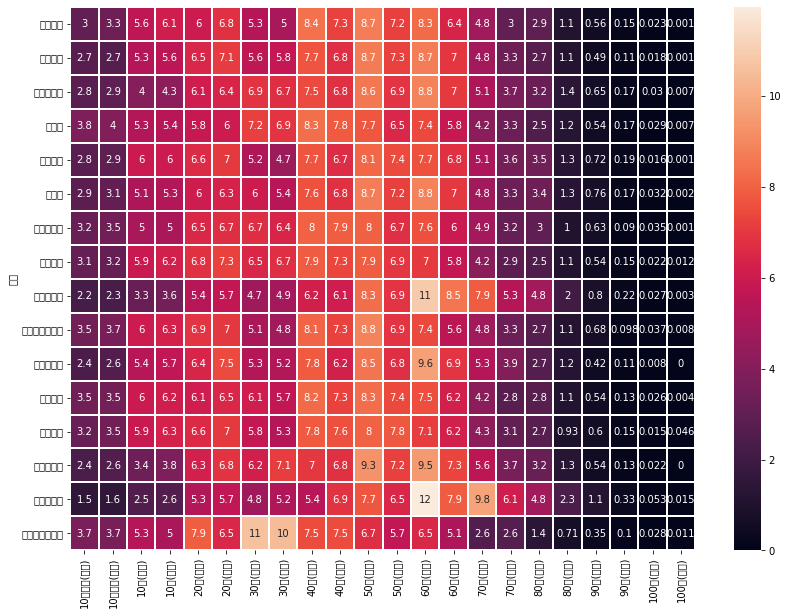

In [307]:
ag=age_gender_info.set_index('지역')
plt.figure(figsize=(14, 10))
sns.heatmap((ag*100).round(3),
           annot=True, linewidths=0.01,)

plt.show()

In [308]:
train['전용면적'].value_counts()

46.90    202
51.93    118
31.84    108
26.37     45
39.72     42
        ... 
23.93      1
46.50      1
29.89      1
29.33      1
54.95      1
Name: 전용면적, Length: 656, dtype: int64

In [309]:
#train['전용면적']=train['전용면적']//5*5
#test['전용면적']=test['전용면적']//5*5

train['전용면적']=train['전용면적']//2*2
test['전용면적']=test['전용면적']//2*2

#train['전용면적']=train['전용면적']//3*3
#test['전용면적']=test['전용면적']//3*3

# idx = train[train['전용면적']>100].index
# train.loc[idx, '전용면적'] = 100
# idx = test[test['전용면적']>100].index
# test.loc[idx, '전용면적'] = 100

# idx = train[train['전용면적']<15].index
# train.loc[idx, '전용면적'] = 15
# idx = test[test['전용면적']<15].index
# test.loc[idx, '전용면적'] = 15

In [310]:
train['전용면적'].value_counts()

46.0     581
36.0     411
50.0     346
26.0     241
38.0     237
58.0     181
30.0     152
32.0     107
28.0      79
20.0      66
22.0      62
84.0      59
74.0      48
48.0      40
16.0      38
54.0      36
24.0      26
18.0      25
40.0      22
44.0      18
14.0      15
42.0      11
34.0      10
66.0       8
62.0       7
52.0       6
240.0      6
582.0      5
126.0      5
136.0      4
72.0       4
248.0      2
404.0      2
56.0       2
406.0      1
60.0       1
400.0      1
82.0       1
108.0      1
12.0       1
316.0      1
Name: 전용면적, dtype: int64

In [311]:
print("train - test (전용면적 차집합) : ", set(train.전용면적).difference(set(test.전용면적))) ##train에만 있는 값들 찾아보기 

train - test (전용면적 차집합) :  {66.0, 136.0, 72.0, 108.0, 406.0, 56.0, 126.0, 316.0, 62.0}


In [312]:
print("train - test (지역 차집합) : ", set(train.지역).difference(set(test.지역))) ##train에만 있는 값들 찾아보기 

# 공가수의 경우 세데수에서 공가수를 뺀 공가율을 통해 계산을 해주고 train에만 있거나 test에만 있는 공가율을 찾아준다.

train - test (지역 차집합) :  {'서울특별시'}


In [313]:
age_gender_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지역         16 non-null     object 
 1   10대미만(여자)  16 non-null     float64
 2   10대미만(남자)  16 non-null     float64
 3   10대(여자)    16 non-null     float64
 4   10대(남자)    16 non-null     float64
 5   20대(여자)    16 non-null     float64
 6   20대(남자)    16 non-null     float64
 7   30대(여자)    16 non-null     float64
 8   30대(남자)    16 non-null     float64
 9   40대(여자)    16 non-null     float64
 10  40대(남자)    16 non-null     float64
 11  50대(여자)    16 non-null     float64
 12  50대(남자)    16 non-null     float64
 13  60대(여자)    16 non-null     float64
 14  60대(남자)    16 non-null     float64
 15  70대(여자)    16 non-null     float64
 16  70대(남자)    16 non-null     float64
 17  80대(여자)    16 non-null     float64
 18  80대(남자)    16 non-null     float64
 19  90대(여자)    16 non-null     float64
 20  90대(남자)    1

In [314]:
age_gender_info.shape

(16, 23)

In [315]:
age_gender_info.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [316]:
train = train[train.전용면적 != 56]
train = train[train.전용면적 != 66]
train = train[train.전용면적 != 72]
train = train[train.전용면적 != 62]
train = train[train.전용면적 != 136]
train = train[train.전용면적 != 108]
train = train[train.전용면적 != 406]
train = train[train.전용면적 != 126]
train = train[train.전용면적 != 316]

train = train[train.지역 != '서울특별시']

In [317]:
train.shape, test.shape

((2786, 15), (1022, 14))

In [318]:
# 지역에 따라 나이별로 병합
train = train.merge(age_gender_info, left_on= ["지역"], right_on= ["지역"], how='left')
test = test.merge(age_gender_info, left_on= ["지역"], right_on= ["지역"], how='left')

In [319]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,32.0,276,17.0,A,9216000.0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,38.0,60,17.0,A,12672000.0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,38.0,20,17.0,A,12672000.0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.0,38,17.0,A,18433000.0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.0,19,17.0,A,18433000.0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [320]:
train.shape, train.drop_duplicates().shape

((2786, 37), (2366, 37))

In [321]:
test.shape, test.drop_duplicates().shape

((1022, 36), (895, 36))

In [322]:
#중복제거
train = train.drop_duplicates()
test = test.drop_duplicates()

In [323]:
# 단지코드 하나의 하나의 종류만 있는 column들을 선정해서 새롭게 만들어줌
# test의 경우 등록차량수 column이 없기 때문에 제외
unique_cols = ['총세대수', '지역', '공가수', 
               '지하철',
               '버스',
               '단지내주차면수', '등록차량수', '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)']
train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()
test_agg = test.set_index('단지코드')[[col for col in unique_cols if col!='등록차량수']].drop_duplicates()

In [324]:
train_agg.head()

,총세대수,지역,공가수,지하철,버스,단지내주차면수,등록차량수,10대미만(여자),10대미만(남자),10대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
단지코드,,,,,,,,,,,,,,,,,,,,,
C2515,545,경상남도,17.0,0.0,3.0,624.0,205.0,0.027400,0.026902,0.053257,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,1064.0,0.028197,0.029092,0.040490,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
C1945,755,경기도,6.0,1.0,3.0,734.0,730.0,0.038030,0.039507,0.052546,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
C1470,696,전라북도,14.0,0.0,2.0,645.0,553.0,0.028089,0.029065,0.059685,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
C1898,566,전라북도,9.0,0.0,6.0,517.0,415.0,0.028089,0.029065,0.059685,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [325]:
train_agg.shape

(405, 29)

In [326]:
train.corr()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
총세대수,1.000000,0.068477,0.234435,0.168401,0.092891,0.084898,0.131429,0.069791,0.700248,0.527610,...,0.216941,0.183344,0.246499,0.334377,0.200995,0.338221,0.087508,0.272386,0.157060,-0.066879
전용면적,0.068477,1.000000,-0.063294,-0.094568,0.170676,0.259694,0.032349,0.002166,0.022302,0.072176,...,0.080881,0.078811,0.081048,0.090716,0.081732,0.091655,0.054076,0.072567,0.021337,-0.020149
전용면적별세대수,0.234435,-0.063294,1.000000,0.124035,-0.070316,-0.015212,-0.008773,0.046167,0.225962,0.182613,...,0.088070,0.077754,0.078986,0.086527,0.068573,0.079153,0.027771,0.031047,0.024006,-0.050215
공가수,0.168401,-0.094568,0.124035,1.000000,0.148209,-0.110969,-0.147013,0.038586,0.319721,0.102168,...,0.069609,0.049736,0.055038,0.005951,0.040763,0.000900,-0.065110,-0.079143,-0.027888,-0.047634
임대보증금,0.092891,0.170676,-0.070316,0.148209,1.000000,0.485147,0.033157,0.141119,0.250119,0.281368,...,-0.088018,-0.139941,-0.081156,-0.009152,-0.119911,0.011079,-0.137082,0.037445,0.152133,-0.089300
임대료,0.084898,0.259694,-0.015212,-0.110969,0.485147,1.000000,0.096339,0.065960,0.260857,0.381835,...,0.016093,-0.043406,-0.024051,0.060649,-0.062048,0.070735,-0.093642,0.078033,0.132121,-0.083075
지하철,0.131429,0.032349,-0.008773,-0.147013,0.033157,0.096339,1.000000,0.094795,0.000982,-0.031088,...,0.316796,0.288073,0.324926,0.387000,0.297972,0.397762,0.195007,0.323041,0.146203,-0.071093
버스,0.069791,0.002166,0.046167,0.038586,0.141119,0.065960,0.094795,1.000000,0.114929,0.136067,...,-0.074380,-0.093898,-0.097698,-0.061849,-0.115992,-0.054719,-0.090181,-0.023389,0.059161,0.003037
단지내주차면수,0.700248,0.022302,0.225962,0.319721,0.250119,0.260857,0.000982,0.114929,1.000000,0.846385,...,-0.087486,-0.128777,-0.113122,-0.026267,-0.135688,-0.018601,-0.163805,0.033401,0.161658,-0.031174
등록차량수,0.527610,0.072176,0.182613,0.102168,0.281368,0.381835,-0.031088,0.136067,0.846385,1.000000,...,-0.164947,-0.207734,-0.195790,-0.117666,-0.211450,-0.120877,-0.204621,-0.034459,0.158350,-0.019793


In [327]:
def reshape_cat_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+col for col in res.columns})
    return res

In [328]:
def reshape_cat_float_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+str(col) for col in res.columns})
    return res

In [329]:
# unique_column을 제외한 우리가 아직 다루지 않은 column : 임대건물구분, 공급유형, 전용면적, 전용면적별세대수, 자격유형, 임대보증금, 임대료
# 한 단지코드에 한가지 종류의 값만을 갖도록 각각의 값들에 대해 column으로 설정
# 예) 임대건물구분_아파트, 임대건물구분_상가, 공급유형_국민임대

In [330]:
# 위의 데이터를 보면 상가의 경우 전용면적별세대수가 1이다
# 아파트의 경우 전용면적세대수가 많다.
# 전용면적별세대수는 '임대' 아파트 대상만으로 집계
# 전체세대수는 '분양'아파트도 포함
# 주차공간은 임대/분양 상관없이 공용으로 사용 => 전체세대수를 기준으로 하는것이 좋을듯함
reshape_cat_features(data = train, cast_col = '임대건물구분', value_col='counter')

# reshape_cat_features를 통해 해당 단지코드가 상가와 아파트 중 어느것을 포함하고 있는가를 볼 수 있음
# 임대건물구분_상가가 1이고 임대건물구분_아파트가 0인 경우: 해당 단지코드에는 상가만 존재
# 임대건물구분_상가가 1이고 임대건물구분_아파트가 1인 경우: 주상복합인 경우

,임대건물구분_상가,임대건물구분_아파트
단지코드,,
C1000,0.0,1.0
C1004,1.0,1.0
C1005,0.0,1.0
C1013,0.0,1.0
C1014,0.0,1.0
...,...,...
C2663,0.0,1.0
C2666,0.0,1.0
C2670,0.0,1.0


In [331]:
reshape_cat_features(data=test,cast_col='임대건물구분',value_col='counter')

,임대건물구분_상가,임대건물구분_아파트
단지코드,,
C1003,0.0,1.0
C1006,1.0,1.0
C1016,0.0,1.0
C1019,0.0,1.0
C1030,0.0,1.0
...,...,...
C2653,0.0,1.0
C2675,0.0,1.0
C2676,1.0,1.0


In [332]:
#근데 임대건물구분, 공급유형, 전용면적, 전용면적별세대수, 자격유형, 임대보증금, 임대료 중에서 임대건물구분이랑 공급유형, 자격유형의 경우는 case가 나누어져있는데
# 전용면적, 전용면적별세대수, 임대보증금, 임대료 얘네는 답도 없게 너무 다양함 => 어떻게 처리해야할까
# 일단은 공급유형하고 자격유형 case 나눠서 처리하고 생각하자

In [333]:
# 공급유형
pd.concat([train.공급유형.value_counts(), test.공급유형.value_counts()], axis=1)

# train의 저 공공분양 6개 대전 그거다 0이어도 상관없겠네
# 국민임대와 행복주택: 집을 매입하지 않고 저렴한 임대료로 입주하는 유형
# 공공임대 주택은 5년 10년 50년 분납 분양

,공급유형,공급유형
국민임대,1674,614.0
임대상가,184,71.0
행복주택,179,114.0
공공임대(10년),144,33.0
영구임대,143,44.0
공공임대(50년),30,13.0
공공분양,6,NaN
공공임대(분납),3,6.0
공공임대(5년),3,NaN


In [334]:
train[(train.공급유형.isin(['공공임대(분납)']))|((train.공급유형.isin(['공공임대(10년)']))&(train.지역.isin(['강원도'])))]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
2229,C1350,1401,아파트,대전광역시,공공임대(분납),50.0,146,2.0,A,54612000.0,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
2230,C1350,1401,아파트,대전광역시,공공임대(분납),58.0,32,2.0,A,63585000.0,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
2231,C1350,1401,아파트,대전광역시,공공임대(분납),58.0,170,2.0,A,63501000.0,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
2430,C2143,363,아파트,강원도,공공임대(10년),74.0,104,2.0,A,36494000.0,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
2431,C2143,363,아파트,강원도,공공임대(10년),74.0,72,2.0,A,36494000.0,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
2432,C2143,363,아파트,강원도,공공임대(10년),84.0,153,2.0,A,46260000.0,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
2433,C2143,363,아파트,강원도,공공임대(10년),84.0,34,2.0,A,46260000.0,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [335]:
train.loc[train.공급유형.isin(['공공임대(50년)','공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/50년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(50년)','공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/50년/분납/분양)'

In [336]:
# 설명 한 단지코드내에서 어떤 건물은 영구임대로 줄 수 있고 어떤 건물은 임대상가로 줄 수 있고 하므로 그것들을 각각 나눠서 표현
reshape_cat_features(data=train, cast_col='공급유형', value_col='counter')

,공급유형_공공임대(5년/10년/50년/분납/분양),공급유형_국민임대,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택
단지코드,,,,,
C1000,0.0,1.0,0.0,0.0,0.0
C1004,0.0,0.0,1.0,1.0,0.0
C1005,0.0,1.0,0.0,0.0,0.0
C1013,0.0,1.0,0.0,0.0,0.0
C1014,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
C2663,0.0,1.0,0.0,0.0,0.0
C2666,0.0,1.0,0.0,0.0,0.0
C2670,0.0,1.0,0.0,0.0,0.0


In [337]:
reshape_cat_features(data=test, cast_col='공급유형', value_col='counter')

,공급유형_공공임대(5년/10년/50년/분납/분양),공급유형_국민임대,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택
단지코드,,,,,
C1003,0.0,0.0,0.0,0.0,1.0
C1006,0.0,0.0,1.0,1.0,0.0
C1016,0.0,1.0,0.0,0.0,0.0
C1019,0.0,1.0,0.0,0.0,0.0
C1030,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
C2653,0.0,1.0,0.0,0.0,0.0
C2675,0.0,1.0,0.0,0.0,0.0
C2676,0.0,0.0,1.0,1.0,0.0


In [338]:
# 자격유형

In [339]:
# 자격유형은 국가유공자, 다자녀와 같은 케이스들도 있지만 일단 가장 첫번째로 대상자의 소득수준에 따라 나눠진다.
# 즉 소득수준이 높은 사람들은 물론 좋은 차를 한대만 가지고 있을 수도 있지만 좋은 차 여러대를 가지고 있을 수도 있다.
train.자격유형.value_counts()

A    1641
D     190
H     154
C      91
J      83
I      44
E      37
K      32
L      32
N      29
B      18
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [340]:
test.자격유형.value_counts()

A    563
H     92
J     74
D     71
C     37
K     16
L     12
E     10
N     10
I      7
M      2
G      1
Name: 자격유형, dtype: int64

In [341]:
print("train - test (자격유형 차집합) : ", set(train.자격유형).difference(set(test.자격유형))) ##train에만 있는 값들 찾아보기 

#train에만 B,F,O의 자격유형이 있음 얘넨 무슨 유형이려나

train - test (자격유형 차집합) :  {'O', 'F', 'B'}


In [342]:
train.loc[train.자격유형=='B', ['임대건물구분', '공급유형']]

,임대건물구분,공급유형
18,아파트,국민임대
20,아파트,국민임대
21,아파트,국민임대
22,아파트,국민임대
23,아파트,국민임대
1154,아파트,국민임대
1155,아파트,국민임대
1156,아파트,국민임대
1157,아파트,국민임대
1158,아파트,국민임대


In [343]:
# 국민임대 자격조건 => 가장 기본적인건 무주택세대구성원이어야함
# 전용면적 < 50 => 3인가구 월평균 70% 이하 (50% 이하일시 우선공급)
# 50<전용면적<=60 => 3인가구 월평균 70% 이하
# 전용면적 > 60 => 3인가구 월평균 100% 이하

train.loc[train.공급유형.isin(['국민임대']), '자격유형'].value_counts()

A    1459
H     154
E      34
B      18
G       9
Name: 자격유형, dtype: int64

In [344]:
train.loc[train.자격유형=='F', ['임대건물구분', '공급유형']]

,임대건물구분,공급유형
502,아파트,영구임대
503,아파트,영구임대
505,아파트,영구임대


In [345]:
# 영구임대 자격조건 => 기본적인건 무주택세대구성원
# 소득기준 = 월평균 50%, 70%, 100%
# 
train.loc[train.공급유형.isin(['영구임대']), '자격유형'].value_counts()

C    91
I    44
E     3
F     3
A     2
Name: 자격유형, dtype: int64

In [346]:
train.loc[train.자격유형=='O', ['임대건물구분', '공급유형']]

,임대건물구분,공급유형
2466,아파트,행복주택


In [347]:
# 행복주택 대상자: 대학생, 청년, 신혼부부, 고령자, 주거급여수여자, 산업단지근로자
# J,K,L,M,N,O 자격유형은 행복주택에만 존재
train.loc[train.공급유형.isin(['행복주택']), '자격유형'].value_counts()

J    83
K    32
L    32
N    29
M     2
O     1
Name: 자격유형, dtype: int64

In [348]:
train.loc[train.공급유형.isin(['공공임대(5년/10년/50년/분납/분양)']),'자격유형'].value_counts()

A    180
D      6
Name: 자격유형, dtype: int64

In [349]:
train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_자격조건대상자'
test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_자격조건대상자'

In [350]:
train.loc[train.자격유형.isin(['A']),'공급유형'].value_counts()

국민임대                      1459
공공임대(5년/10년/50년/분납/분양)     180
영구임대                         2
Name: 공급유형, dtype: int64

In [351]:
train.loc[train.자격유형.isin(['D']),'공급유형'].value_counts()

임대상가                      184
공공임대(5년/10년/50년/분납/분양)      6
Name: 공급유형, dtype: int64

In [352]:
train.loc[train.자격유형.isin(['B']),'공급유형'].value_counts()

국민임대    18
Name: 공급유형, dtype: int64

In [353]:
train.loc[train.자격유형.isin(['C']),'공급유형'].value_counts()

영구임대    91
Name: 공급유형, dtype: int64

In [354]:
train.loc[train.자격유형.isin(['E']),'공급유형'].value_counts()

국민임대    34
영구임대     3
Name: 공급유형, dtype: int64

In [355]:
train.loc[train.자격유형.isin(['F']),'공급유형'].value_counts()

영구임대    3
Name: 공급유형, dtype: int64

In [356]:
train.loc[train.자격유형.isin(['G']),'공급유형'].value_counts()

국민임대    9
Name: 공급유형, dtype: int64

In [357]:
train.loc[train.자격유형.isin(['H']),'공급유형'].value_counts()

국민임대    154
Name: 공급유형, dtype: int64

In [358]:
train.loc[train.자격유형.isin(['I']),'공급유형'].value_counts()

영구임대    44
Name: 공급유형, dtype: int64

In [359]:
# B,G,H 는 국민임대만 있고
# C,F,I 는 영구임대만 있고
# A는 국민임대가 89%, 공공임대가 10.9%, 0.1%
# D는 임대상가 96%, 공공임대 4%
# E는 국민임대 91.9%, 영구임대 8.1%

In [360]:
#B,G,H는 국민임대, C,F,I는 영구임대로 묶어주고 A,D,E는 놔두기
train.loc[train.자격유형.isin(['B','G','H']),'자격유형']='국민임대_자격조건대상자'
test.loc[test.자격유형.isin(['B','G','H']),'자격유형']='국민임대_자격조건대상자'

train.loc[train.자격유형.isin(['C','F','I']),'자격유형']='영구임대_자격조건대상자'
test.loc[test.자격유형.isin(['C','F','I']),'자격유형']='영구임대_자격조건대상자'

In [361]:
pd.concat([train.자격유형.value_counts(), 
           test.자격유형.value_counts()], axis=1)

,자격유형,자격유형
A,1641,563
D,190,71
국민임대_자격조건대상자,181,93
행복주택_자격조건대상자,179,114
영구임대_자격조건대상자,138,44
E,37,10


In [362]:
reshape_cat_features(data=train, cast_col='자격유형', value_col='counter')

,자격유형_A,자격유형_D,자격유형_E,자격유형_국민임대_자격조건대상자,자격유형_영구임대_자격조건대상자,자격유형_행복주택_자격조건대상자
단지코드,,,,,,
C1000,1.0,0.0,0.0,0.0,0.0,0.0
C1004,0.0,1.0,0.0,0.0,1.0,0.0
C1005,1.0,0.0,0.0,0.0,0.0,0.0
C1013,1.0,0.0,0.0,0.0,0.0,0.0
C1014,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
C2663,0.0,0.0,0.0,1.0,0.0,0.0
C2666,1.0,0.0,0.0,0.0,0.0,0.0
C2670,1.0,0.0,0.0,0.0,0.0,0.0


In [363]:
# 전용면적, 임대료, 임대보증금, 전용면적별세대수 그냥 평균으로 처리해버리기

train_mean = train.groupby(['단지코드']).mean()
test_mean = test.groupby(['단지코드']).mean()

train_agg['전용면적별세대수 평균']=train_mean['전용면적별세대수']
test_agg['전용면적별세대수 평균']=test_mean['전용면적별세대수']

train_agg['임대보증금 평균'] = train_mean['임대보증금']
test_agg['임대보증금 평균'] = test_mean['임대보증금']

train_agg['임대료 평균'] = train_mean['임대료']
test_agg['임대료 평균'] = test_mean['임대료']

In [364]:
train_data = pd.concat([train_agg,
                       reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter'),
                        reshape_cat_features(data=train, cast_col='공급유형', value_col='counter'),
                        reshape_cat_features(data=train, cast_col='자격유형', value_col='counter'),
                        reshape_cat_float_features(data=train, cast_col='전용면적', value_col='counter')
                       ],axis=1)

test_data = pd.concat([test_agg,
                       reshape_cat_features(data=test, cast_col='임대건물구분', value_col='counter'),
                        reshape_cat_features(data=test, cast_col='공급유형', value_col='counter'),
                        reshape_cat_features(data=test, cast_col='자격유형', value_col='counter'),
                        reshape_cat_float_features(data=test, cast_col='전용면적', value_col='counter')
                       ],axis=1)

In [365]:
train_data.shape, test_data.shape

((405, 77), (150, 78))

In [366]:
train_data['실거주율']= (train_agg['총세대수'] - train_agg['공가수'])/train_agg['총세대수']
test_data['실거주율']= (test_agg['총세대수'] - test_agg['공가수'])/test_agg['총세대수']

In [367]:
train_data.head()

,총세대수,지역,공가수,지하철,버스,단지내주차면수,등록차량수,10대미만(여자),10대미만(남자),10대(여자),...,전용면적_60.0,전용면적_74.0,전용면적_82.0,전용면적_84.0,전용면적_240.0,전용면적_248.0,전용면적_400.0,전용면적_404.0,전용면적_582.0,실거주율
단지코드,,,,,,,,,,,,,,,,,,,,,
C2515,545,경상남도,17.0,0.0,3.0,624.0,205.0,0.027400,0.026902,0.053257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.968807
C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,1064.0,0.028197,0.029092,0.040490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989309
C1945,755,경기도,6.0,1.0,3.0,734.0,730.0,0.038030,0.039507,0.052546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992053
C1470,696,전라북도,14.0,0.0,2.0,645.0,553.0,0.028089,0.029065,0.059685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979885
C1898,566,전라북도,9.0,0.0,6.0,517.0,415.0,0.028089,0.029065,0.059685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.984099


In [368]:
train_data['한 세대에 할당되는 주차면수']=train_agg['단지내주차면수']/train_agg['총세대수']
test_data['한 세대에 할당되는 주차면수']=test_agg['단지내주차면수']/test_agg['총세대수']

In [369]:
# 임대보증금과 임대료는 너무 값이 크니까 log 취해줘서 값을 작게 만들기

train_data['임대보증금log']=np.log1p(train_data['임대보증금 평균'])
test_data['임대보증금log']=np.log1p(test_data['임대보증금 평균'])

train_data['임대료log']=np.log1p(train_data['임대료 평균'])
test_data['임대료log']=np.log1p(test_data['임대료 평균'])

train_data['단지내주차면수log']=np.log1p(train_data['단지내주차면수'])
test_data['단지내주차면수log']=np.log1p(test_data['단지내주차면수'])

train_data['총세대수log']=np.log1p(train_data['총세대수'])
test_data['총세대수log']=np.log1p(test_data['총세대수'])

train_data['전용면적별세대수 평균 log'] = np.log1p(train_data['전용면적별세대수 평균'])
test_data['전용면적별세대수 평균 log'] = np.log1p(test_data['전용면적별세대수 평균'])

In [370]:
train_data.shape

(405, 84)

In [371]:
# 상관관계가 크면 회귀 계산을 계산하여 추정하는것이 어렵다
train_data.corr(method='pearson')['등록차량수'].sort_values()

공급유형_임대상가    -0.317433
임대건물구분_상가    -0.317433
전용면적_30.0    -0.282042
자격유형_D       -0.272995
50대(남자)      -0.253654
                ...   
총세대수log       0.601823
단지내주차면수log    0.769600
단지내주차면수       0.847085
등록차량수         1.000000
임대건물구분_아파트         NaN
Name: 등록차량수, Length: 83, dtype: float64

In [372]:
train_data.corr(method='kendall')['등록차량수'].sort_values()

공급유형_임대상가    -0.322908
임대건물구분_상가    -0.322908
자격유형_D       -0.306034
전용면적_30.0    -0.286384
공급유형_영구임대    -0.225091
                ...   
총세대수log       0.493127
단지내주차면수       0.699975
단지내주차면수log    0.699975
등록차량수         1.000000
임대건물구분_아파트         NaN
Name: 등록차량수, Length: 83, dtype: float64

In [373]:
train_data.corr(method='spearman')['등록차량수'].sort_values()

임대건물구분_상가    -0.394833
공급유형_임대상가    -0.394833
자격유형_D       -0.374199
전용면적_30.0    -0.350173
공급유형_영구임대    -0.275227
                ...   
총세대수          0.640492
단지내주차면수       0.869815
단지내주차면수log    0.869815
등록차량수         1.000000
임대건물구분_아파트         NaN
Name: 등록차량수, Length: 83, dtype: float64

In [374]:
local_map={}
for i,loc in enumerate(train_data['지역'].unique()):
    local_map[loc]=i

In [375]:
train_data['지역']=train_data['지역'].map(local_map)
test_data['지역']=test_data['지역'].map(local_map)

In [376]:
train_data.shape, test_data.shape

((405, 84), (150, 85))

In [377]:
train_data.head()

,총세대수,지역,공가수,지하철,버스,단지내주차면수,등록차량수,10대미만(여자),10대미만(남자),10대(여자),...,전용면적_400.0,전용면적_404.0,전용면적_582.0,실거주율,한 세대에 할당되는 주차면수,임대보증금log,임대료log,단지내주차면수log,총세대수log,전용면적별세대수 평균 log
단지코드,,,,,,,,,,,,,,,,,,,,,
C2515,545,0,17.0,0.0,3.0,624.0,205.0,0.027400,0.026902,0.053257,...,0.0,0.0,0.0,0.968807,1.144954,16.636124,11.846237,6.437752,6.302619,4.367638
C1407,1216,1,13.0,1.0,1.0,1285.0,1064.0,0.028197,0.029092,0.040490,...,0.0,0.0,0.0,0.989309,1.056743,17.073006,12.019486,7.159292,7.104144,4.747104
C1945,755,2,6.0,1.0,3.0,734.0,730.0,0.038030,0.039507,0.052546,...,0.0,0.0,0.0,0.992053,0.972185,16.996086,12.210637,6.599870,6.628041,4.852030
C1470,696,3,14.0,0.0,2.0,645.0,553.0,0.028089,0.029065,0.059685,...,0.0,0.0,0.0,0.979885,0.926724,16.690360,11.696505,6.470800,6.546785,5.164786
C1898,566,3,9.0,0.0,6.0,517.0,415.0,0.028089,0.029065,0.059685,...,0.0,0.0,0.0,0.984099,0.913428,16.673264,11.688133,6.249975,6.340359,4.557380


In [378]:
#train_data = train_data[['총세대수', '지역', '공가수', '지하철', '버스', '단지내주차면수', '10대미만(여자)',
#       '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)',
#       '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)',
#       '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)',
#       '90대(남자)', '100대(여자)', '100대(남자)', '전용면적별세대수 평균', '임대보증금 평균', '임대료 평균',
#       '임대건물구분_상가', '임대건물구분_아파트', '공급유형_공공임대(5년/10년/50년/분납/분양)', '공급유형_국민임대',
#       '공급유형_영구임대', '공급유형_임대상가', '공급유형_행복주택', '자격유형_A', '자격유형_D', '자격유형_E',
#       '자격유형_국민임대_자격조건대상자', '자격유형_영구임대_자격조건대상자', '자격유형_행복주택_자격조건대상자',
#       '전용면적_12.0', '전용면적_14.0', '전용면적_16.0', '전용면적_18.0', '전용면적_20.0',
#       '전용면적_22.0', '전용면적_24.0', '전용면적_26.0', '전용면적_28.0', '전용면적_30.0',
#       '전용면적_32.0', '전용면적_34.0', '전용면적_36.0', '전용면적_38.0', '전용면적_40.0',
#       '전용면적_42.0', '전용면적_44.0', '전용면적_46.0', '전용면적_48.0', '전용면적_50.0',
#       '전용면적_52.0', '전용면적_54.0', '전용면적_58.0', '전용면적_60.0', '전용면적_74.0',
#       '전용면적_82.0', '전용면적_84.0', '전용면적_240.0', '전용면적_248.0', '전용면적_400.0',
#       '전용면적_404.0', '전용면적_582.0', '실거주율', '한 세대에 할당되는 주차면수', '등록차량수']]

In [379]:
test_data.columns

Index(['총세대수', '지역', '공가수', '지하철', '버스', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)', '전용면적별세대수 평균', '임대보증금 평균', '임대료 평균',
       '임대건물구분_상가', '임대건물구분_아파트', '공급유형_공공임대(5년/10년/50년/분납/분양)', '공급유형_국민임대',
       '공급유형_영구임대', '공급유형_임대상가', '공급유형_행복주택', '자격유형_A', '자격유형_D', '자격유형_E',
       '자격유형_국민임대_자격조건대상자', '자격유형_영구임대_자격조건대상자', '자격유형_행복주택_자격조건대상자',
       '전용면적_8.0', '전용면적_12.0', '전용면적_14.0', '전용면적_16.0', '전용면적_18.0',
       '전용면적_20.0', '전용면적_22.0', '전용면적_24.0', '전용면적_26.0', '전용면적_28.0',
       '전용면적_30.0', '전용면적_32.0', '전용면적_34.0', '전용면적_36.0', '전용면적_38.0',
       '전용면적_40.0', '전용면적_42.0', '전용면적_44.0', '전용면적_46.0', '전용면적_48.0',
       '전용면적_50.0', '전용면적_52.0', '전용면적_54.0', '전용면적_58.0', '전용면적_60.0',
       '전용면적_74.0', '전용면적_82.0', '전용면적_84.0', '전용면적_

In [380]:
set(train.columns).difference(set(test.columns))

{'등록차량수'}

In [381]:
test_data = test_data.drop(['전용면적_8.0','전용면적_252.0'],axis=1)
test_data.shape[1]

83

In [382]:
# 전용면적_8.0 전용면적_252.0
set(test.columns).difference(set(train.columns))

set()

In [383]:
x_train = train_data.iloc[:, 1:-1]
#x_train = train_data.iloc[:,0:-1]
y_train = train_data.iloc[:,-1]
x_test = test_data.iloc[:,1:]

In [384]:
train_data.shape, test_data.shape

((405, 84), (150, 83))

In [399]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)
#from catboost import CatBoostRegressor

#cat_features=['지역']
#target_col='등록차량수'
#catb = CatBoostRegressor(
#          cat_features=cat_features,
#          loss_function='MAE',
#          n_estimators=7000, 
#          learning_rate=0.05, 
#          random_state=42
#     )

#catb.fit(train_data.drop(columns=[target_col]), train_data[target_col], verbose=100)

In [401]:
score=-cross_val_score(model, train_data.drop(columns=[target_col]), train_data[target_col], cv=3, scoring='neg_mean_absolute_error', 
                          n_jobs=8).mean()
score

150.39829629629628

6885:	learn: 0.8939085	total: 45.5s	remaining: 753ms
6886:	learn: 0.8939054	total: 45.5s	remaining: 747ms
6887:	learn: 0.8938608	total: 45.5s	remaining: 740ms
6888:	learn: 0.8938511	total: 45.5s	remaining: 734ms
6889:	learn: 0.8938366	total: 45.5s	remaining: 727ms
6890:	learn: 0.8936255	total: 45.5s	remaining: 720ms
6891:	learn: 0.8936061	total: 45.5s	remaining: 714ms
6892:	learn: 0.8935996	total: 45.6s	remaining: 707ms
6893:	learn: 0.8934720	total: 45.6s	remaining: 701ms
6894:	learn: 0.8934169	total: 45.6s	remaining: 694ms
6895:	learn: 0.8933890	total: 45.6s	remaining: 687ms
6896:	learn: 0.8932739	total: 45.6s	remaining: 681ms
6897:	learn: 0.8925432	total: 45.6s	remaining: 674ms
6898:	learn: 0.8924852	total: 45.6s	remaining: 667ms
6899:	learn: 0.8924682	total: 45.6s	remaining: 661ms
6900:	learn: 0.8892470	total: 45.6s	remaining: 654ms
6901:	learn: 0.8891247	total: 45.6s	remaining: 648ms
6902:	learn: 0.8889970	total: 45.6s	remaining: 641ms
6903:	learn: 0.8889828	total: 45.6s	remaining:

6891:	learn: 0.7887175	total: 47.8s	remaining: 749ms
6892:	learn: 0.7887159	total: 47.8s	remaining: 742ms
6893:	learn: 0.7887105	total: 47.8s	remaining: 735ms
6894:	learn: 0.7887088	total: 47.8s	remaining: 728ms
6895:	learn: 0.7887029	total: 47.8s	remaining: 721ms
6896:	learn: 0.7886939	total: 47.8s	remaining: 714ms
6897:	learn: 0.7886905	total: 47.8s	remaining: 707ms
6898:	learn: 0.7886867	total: 47.8s	remaining: 700ms
6899:	learn: 0.7886799	total: 47.8s	remaining: 693ms
6900:	learn: 0.7886644	total: 47.8s	remaining: 686ms
6901:	learn: 0.7886580	total: 47.8s	remaining: 679ms
6902:	learn: 0.7886524	total: 47.8s	remaining: 672ms
6903:	learn: 0.7883809	total: 47.8s	remaining: 665ms
6904:	learn: 0.7883596	total: 47.8s	remaining: 658ms
6905:	learn: 0.7883522	total: 47.8s	remaining: 651ms
6906:	learn: 0.7883458	total: 47.8s	remaining: 644ms
6907:	learn: 0.7883442	total: 47.9s	remaining: 637ms
6908:	learn: 0.7883404	total: 47.9s	remaining: 630ms
6909:	learn: 0.7883364	total: 47.9s	remaining:

In [ ]:
#type(test_data[target_col])

In [ ]:
type(target_col)

In [ ]:
#model.fit(x_train, y_train)

In [ ]:
#relation_square = catb.score(x_train, y_train)
#print('결정계수 : ', relation_square)

In [ ]:
cat_pred = catb.predict(test_data)
#pred = model.predict(test_data)

In [ ]:
#submission = pd.read_csv('./sample_submission.csv')
#submission['num'] = cat_pred

#submission = pd.read_csv('./sample_submission.csv')
#submission['num']=pred
#submission.to_csv('submission_lr.csv',index=False)

In [ ]:
#submission.to_csv('submission_catboost_2022_8_1.csv', index=False)

In [ ]:
#!pip install catboost

In [ ]:
#cat_features = ['지역']
#$target_col = '등록차량수'

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier

#classifier = KNeighborsClassifier(n_neighbors = 3)
#classifier.fit(train_data)

In [ ]:
import shap

In [ ]:
test_data.columns

In [ ]:
feature_names=test_data.columns.to_list()
explainer = shap.TreeExplainer(catb) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_data) # Shap Values 계산
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], feature_names)

In [ ]:
test_data.rename(columns={
    '총세대수':'num_of_all_households',
    '지역':'region',
    '공가수':'empty_ocuupancy',
    '지하철':'sub',
    '버스':'bus',
    '단지내주차면수':'num_of_parking_space',
    '임대료':'rental_fee',
    '임대보증금log':'rental_deposit',
    '실거주율':'actual_occupancy',
    '총세대수log':'num_of_all_households_log',
    '한 세대에 할당되는 주차면수':'num_of_parking_space_for_a_household',
    '단지내주차면수log':'num_of_parking_space_log',
    '전용면적별세대수 평균 log':'space_for_household_mean_log',
},inplace=True)
feature_names=test_data.columns.to_list()

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, test_data,feature_names) 

In [ ]:
shap.summary_plot(shap_values, test_data,feature_names)

In [ ]:
shap.summary_plot(shap_values, test_data, plot_type = "bar")